In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [4]:
df=pd.read_csv("insurance_data.csv")
x=df.iloc[:,:-1].values
y=df.iloc[:,1].values
print(df.shape)
df.head(5)

(27, 2)


,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1


In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.8)

In [5]:
x_test

array([[22],
       [49],
       [55],
       [21],
       [19],
       [29]], dtype=int64)

In [6]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [7]:
x_test

array([[22],
       [49],
       [55],
       [21],
       [19],
       [29]], dtype=int64)

In [8]:
x_test.ndim

2

In [9]:
y_pred=model.predict(x_test)
model.predict_proba(x_test)

array([[0.86012534, 0.13987466],
       [0.22491647, 0.77508353],
       [0.12832914, 0.87167086],
       [0.87318594, 0.12681406],
       [0.89619252, 0.10380748],
       [0.73588014, 0.26411986]])

In [10]:
print('predicted response:',y_pred,sep='\n')

predicted response:
[0 1 1 0 0 0]


In [11]:
y_pred.ndim

1

In [12]:
y_pred=y_pred.reshape(1,-1)

In [13]:
y_pred.shape

(1, 6)

In [14]:
y_pred.ndim

2

In [15]:
r2=model.score(x_test,y_test)
b0=model.intercept_
b1=model.coef_
print('coefficient of Determination:', r2)
print('==========================================')
print('intercept: =b0', b0)
print('==========================================')
print('slope: =b0', b1)

coefficient of Determination: 1.0
intercept: =b0 [-4.30442793]
slope: =b0 [[0.1130953]]


In [16]:
df=pd.DataFrame({'Actual': y_test,'Predicted': y_test})
df

,Actual,Predicted
0,0,0
1,1,1
2,1,1
3,0,0
4,0,0
5,0,0


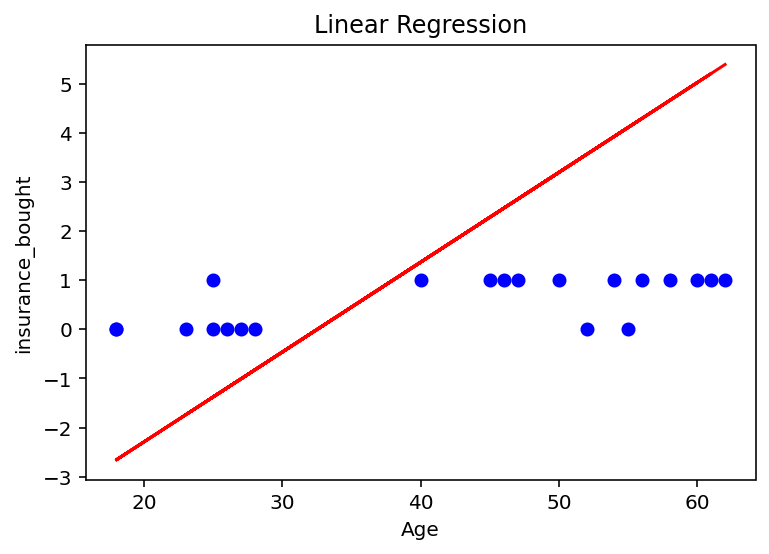

In [17]:
plt.scatter(x_train,y_train,color="blue")
plt.plot(x_train,-5.94531895+0.18278517*x_train,color="red")
plt.title("Linear Regression")
plt.xlabel("Age")
plt.ylabel("insurance_bought")
plt.show()

In [18]:
import math
def sigmoid(x):
    return 1 / (1+math.exp(-x))

In [19]:
def prediction_function(age):
    z = 0.182 * age - 5.98
    y = sigmoid(z)
    return y

In [20]:
age = 24
prediction_function(age)

0.16631112500884632

In [23]:
age = 100
prediction_function(age)

0.9999950691784009

In [47]:
import pickle

In [48]:
with open('model_pickle','wb')as f:
    pickle.dump(model,f)

In [49]:
with open('model_pickle','rb')as f:
    mp=pickle.load(f)

In [ ]:
mp.predict(x_test)